# Pós-Processamento MonitEM:

## Visão geral:
Este Notebook tem como objetivo realizar o pós-processamento das métricas obtidas nas medições com o equipamento MonitEM.

## Preparando o pós-processamento:
1) É aconselhado a criação de uma pasta dedicada a esse processo, onde este notebook estará contido.
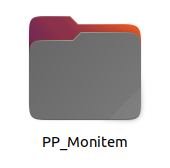
2) Dentro da pasta de trabalho, crie um diretório para armazenar os arquivos de medições (**.txt**).

* **DICA:** Você pode criar diferentes diretórios para os arquivos de medições (**e.g.**, arquivos_indoor, arquivos_outdoor, arquivos_comgps) e realizar o pós-processamento para diferentes cenários.
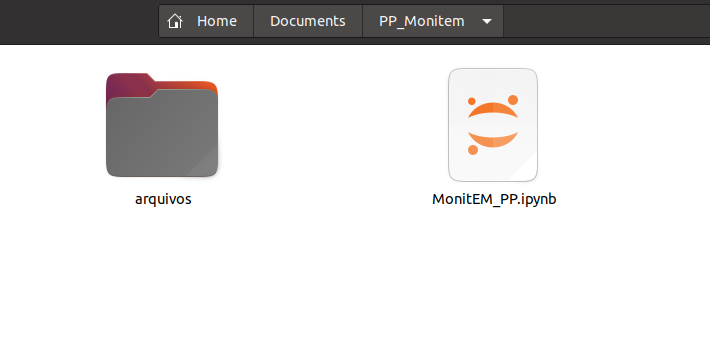
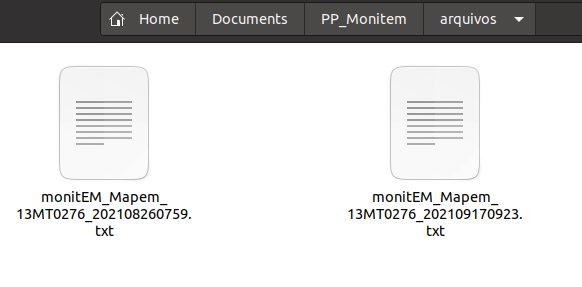

## Importando módulos
Aqui estão sendo importados alguns módulos importantes para a execução do código e a criação de funções úteis.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import glob

def getdate(path):
    datefile = open(path, 'r')
    date = datefile.readlines()[1][6:16]
    return date

## Caminho dos arquivos
Nessa etapa o usuário define qual o diretório com arquivos de medição que se deseja trabalhar.
* Caso esteja rodando em sistemas operacionais diferentes comentar a linha que não será utilizada!

In [6]:
# Linux path
#path = "/home/lucasismael/Documents/PP_Monitem/arquivos/"
#iswindows = False
# Windows path
path = r"C:\Users\Lucas Ismael\Desktop\PP_Monitem\arquivos\\"
iswindows = True

## Pós-processamento
Aqui o pós-processamento será realizado, analisando os arquivos e salvando algumas métricas pertinentes.

**Métricas Configuradas:**
* Nome do arquivo;
* Data de medição;
* Valor médio;
* Desvio-padrão;
* Valor mínimo;
* Valor máximo.

In [7]:
newdata = []

# Retrieve file information
filelist = glob.glob(path+"*.txt")
print("Files found: " + str(len(filelist)) + '\n')

if iswindows == False:
    # Start Processing
    for file in filelist:
        usefulfilename = file.split('/')[-1].split('.')[0]
        print("File: " + str(usefulfilename))
        usefuldate = getdate(file)
        linesdate  =   usefuldate.split('/')[2] +"/"+ usefuldate.split('/')[0] +"/"+ usefuldate.split('/')[1] # Reorder Date
        print("Date: " + usefuldate)
        data = pd.read_csv(file, skiprows=6)
        usefullines = data[data['Date'] == linesdate].index.values # Get same day metrics
        usefuldata = data.iloc[usefullines[0]:,:]
        print("Start Time: " + str(usefuldata['Time'][usefullines[0]]))
        usefulmeanfield = np.mean(usefuldata['Value']) # Calc Mean
        print("Mean Field: " + str(usefulmeanfield))
        usefulstd = np.std(usefuldata['Value']) # Calc Std
        print("Standard deviation: " + str(usefulstd))
        usefulmaxvalue = np.max(usefuldata['Value']) # Find Max. Field Value
        arraynonzerominvalue = np.array(usefuldata['Value']) # Copy values array in order to use numpy methods
        usefulminvalue = np.min(arraynonzerominvalue[np.nonzero(arraynonzerominvalue)]) # Find Min. Non-zero Field Value
        print("Maximum Value: " + str(usefulmaxvalue))
        print("Minimum Value: " + str(usefulminvalue) + '\n')

        newdata.append([usefulfilename, usefuldate, usefulmeanfield, usefulstd, usefulminvalue, usefulmaxvalue]) # Saving all useful metrics
        
elif iswindows == True:
    # Start Processing
    for file in filelist:
        usefulfilename = file.split('\\')[-1].split('.')[0]
        print("File: " + str(usefulfilename))
        usefuldate = getdate(file)
        linesdate  =   usefuldate.split('/')[2] +"/"+ usefuldate.split('/')[0] +"/"+ usefuldate.split('/')[1] # Reorder Date
        print("Date: " + usefuldate)
        data = pd.read_csv(file, skiprows=6)
        usefullines = data[data['Date'] == linesdate].index.values # Get same day metrics
        usefuldata = data.iloc[usefullines[0]:,:]
        print("Start Time: " + str(usefuldata['Time'][usefullines[0]]))
        usefulmeanfield = np.mean(usefuldata['Value']) # Calc Mean
        print("Mean Field: " + str(usefulmeanfield))
        usefulstd = np.std(usefuldata['Value']) # Calc Std
        print("Standard deviation: " + str(usefulstd))
        usefulmaxvalue = np.max(usefuldata['Value']) # Find Max. Field Value
        arraynonzerominvalue = np.array(usefuldata['Value']) # Copy values array in order to use numpy methods
        usefulminvalue = np.min(arraynonzerominvalue[np.nonzero(arraynonzerominvalue)]) # Find Min. Non-zero Field Value
        print("Maximum Value: " + str(usefulmaxvalue))
        print("Minimum Value: " + str(usefulminvalue) + '\n')

        newdata.append([usefulfilename, usefuldate, usefulmeanfield, usefulstd, usefulminvalue, usefulmaxvalue]) # Saving all useful metrics
    
    
finaldata = pd.DataFrame(newdata, columns=['Arquivo','Data', 'Media', 'Std', 'Min', 'Max']) # Saving metrics to a new DataFrame    

Files found: 2

File: monitEM_Mapem_13MT0276_202108260759
Date: 08/26/2021
Start Time: 07:13:42
Mean Field: 0.5934580183048214
Standard deviation: 0.4499008379140912
Maximum Value: 2.38
Minimum Value: 0.03

File: monitEM_Mapem_13MT0276_202109170923
Date: 09/17/2021
Start Time: 08:09:54
Mean Field: 0.43216196319018313
Standard deviation: 0.3744851527045425
Maximum Value: 3.91
Minimum Value: 0.01



## Exportar resultados para Excel

In [24]:
outputname = "saida" # Output filename
#finaldata.to_excel("/home/lucasismael/Documents/PP_Monitem/" + outputname + ".xlsx") # Export DataFrame to Excel
finaldata.to_excel(r"C:\Users\Lucas Ismael\Desktop\PP_Monitem\\" + outputname + ".xlsx") # Export DataFrame to Excel

Exemplo de uma saída em Excel:

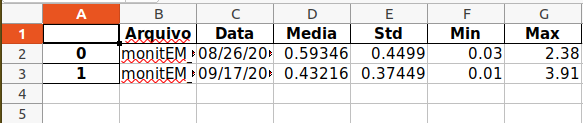

## Plots

Aqui você pode tentar plotar alguns resultados via Python.

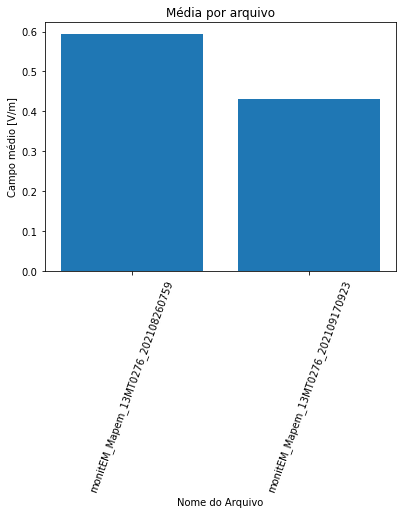

In [8]:
# Exemplo Plot:
plt.bar(finaldata['Arquivo'], finaldata['Media'])
plt.tight_layout()
plt.tick_params(axis = 'x', labelrotation = 70)
plt.xlabel("Nome do Arquivo")
plt.ylabel("Campo médio [V/m]")
plt.title("Média por arquivo")
plt.show()